In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
dfTrain = pd.read_csv('../data/TRAIN_TEST_corrected2/train_corrected2.csv')
train = dfTrain.drop(['price_usd', 'id'], axis=1)
target = dfTrain.price_usd

In [21]:
# DATA SCALING

scaler = StandardScaler().fit(train)
train = pd.DataFrame(scaler.transform(train), columns=train.columns)
train.head(3)

,year_created,month_created,day_created,distance_to_obelisco_mtrs,lat,lon,surface_total_in_m2,rooms,PH,apartment,house,store
0,-1.01997,0.544819,1.151263,-0.254778,-0.257360,0.179151,-0.355479,0.566074,-0.253632,0.851851,-0.725942,-0.123193
1,-1.01997,0.544819,1.151263,-0.260130,-0.257184,0.189939,-0.397511,-0.346374,-0.253632,0.851851,-0.725942,-0.123193
2,-1.01997,0.544819,1.151263,-0.238270,-0.257482,0.145996,-0.149989,-0.346374,-0.253632,-1.173914,1.377521,-0.123193


In [22]:
# PARAMETROS PARA SVM
param_grid = [
                {'C': [140], 
                 'epsilon' : [0.0, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.6, 0.7],
                 'max_iter' : [300],
                 'gamma' : ['auto'] }]

# MEDIDA DE SCORE PARA CROSS-VALIDATION
scoring = {'MSE': 'neg_mean_squared_error'}

svr = SVR()
gs = GridSearchCV(svr, scoring=scoring, param_grid=param_grid, cv=10, refit='MSE', return_train_score=False)

In [23]:
# COMIENZO EL GRID SEARCH
gs.fit(train, target);

c:\python27\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [24]:
results = gs.cv_results_
dfResults = pd.DataFrame(results).loc[:, ('rank_test_MSE', 'mean_test_MSE', 
                                          'param_C', 'param_epsilon')].infer_objects()

In [25]:
dfResults.sort_values(by='rank_test_MSE').head(10)

,rank_test_MSE,mean_test_MSE,param_C,param_epsilon
0,1,-5.986817e+12,140,0.00
1,2,-5.986817e+12,140,0.05
2,3,-5.986817e+12,140,0.10
3,4,-5.986817e+12,140,0.20
4,5,-5.986817e+12,140,0.25
5,6,-5.986817e+12,140,0.30
6,7,-5.986817e+12,140,0.35
7,8,-5.986817e+12,140,0.60
8,9,-5.986817e+12,140,0.70


In [26]:
#combinatorias = set()

#for gamma in param_grid[0]['gamma'] :
#    for _c in param_grid[0]['C'] :
#        tupla = (_c, gamma)
        
#        if tupla not in combinatorias and tupla[::-1] not in combinatorias :
#            combinatorias.add(tupla)
            
#dfs = []

#for opcion in combinatorias :
#    dfs.append(dfResults.loc[dfResults.param_gamma.str.contains(opcion[0]) & dfResults.param_C.str.contains(opcion[1])])

In [27]:
# Ploteo los resultados

#ax = None
#for df in dfs :
#    df = df.reset_index()
#    new_name = df.param_gamma[0] + ' | ' + df.param_C[0]
#    df = df.rename(columns={'mean_test_MSE':new_name })
#    ax = df.plot(ax=ax, x='param_n_neighbors', y=new_name, 
#                 figsize=(12, 12))

#ax.grid()
#ax.set_title("Grid Search SVR: finding best metric and k value", fontsize=18)
#ax.set_xlabel('K neighbors', fontsize=14)
#ax.set_ylabel('NegMSE\n(higher is better)', fontsize=14)
#ax.legend(fontsize=11);

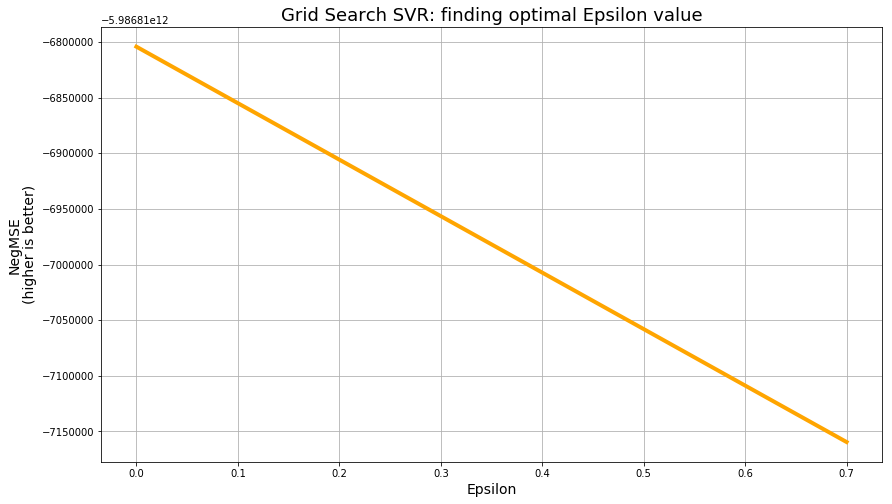

In [28]:
ax = dfResults.plot(x='param_epsilon', y='mean_test_MSE', 
                    figsize=(14, 8), lw=4, 
                    legend=False, color='orange')
ax.grid()
ax.set_title("Grid Search SVR: finding optimal Epsilon value", fontsize=18)
ax.set_xlabel('Epsilon', fontsize=14)
ax.set_ylabel('NegMSE\n(higher is better)', fontsize=14)

In [29]:
print "\nMejores parametros:", gs.best_params_
print "Tuvieron un error de:", repr(-gs.best_score_), "midiendo como MSE"


Mejores parametros: {'epsilon': 0.0, 'C': 140, 'max_iter': 300, 'gamma': 'auto'}
Tuvieron un error de: 5986816804292.915 midiendo como MSE
